In [66]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN

from scipy.signal import find_peaks

import matplotlib
from pylab import rcParams
#%matplotlib widget, camera ready submission problem
matplotlib.rc('pdf', fonttype=42)
matplotlib.rcParams['savefig.dpi'] = 300
rcParams.update({'figure.autolayout': True})

def readfile(filename):
    types = {'frequency': float,'power': float}
    df = pd.read_csv(filename, skiprows=0, header=None, error_bad_lines=False, delim_whitespace=False, delimiter=' ')
    df.columns = ['frequency', 'power']
    df.dropna(inplace=True)
    #print(df.describe())
    return df

In [67]:
# df = pd.DataFrame(columns=["Office_1", "Office_2", "Office_3", "3rd Floor", "4th Floor"], index=["Round_1", "Round_2", "Round_3"])

# BER.iloc[:,0] = [round(i, 6) for i in []]
# BER.iloc[:,1] = [round(i, 6) for i in []]
# BER.iloc[:,2] = [round(i, 6) for i in []]
# BER.iloc[:,3] = [round(i, 6) for i in []]
# BER.iloc[:,4] = [round(i, 6) for i in []]

# df = pd.DataFrame(columns=["Office_1", "Office_2", "Office_3", "3rd Floor", "4th Floor"], index=["Round_1", "Round_2", "Round_3"])

# RSSI.iloc[:,0] = [round(i, 6) for i in []]
# RSSI.iloc[:,1] = [round(i, 6) for i in []]
# RSSI.iloc[:,2] = [round(i, 6) for i in []]
# RSSI.iloc[:,3] = [round(i, 6) for i in []]
# RSSI.iloc[:,4] = [round(i, 6) for i in []]

In [69]:
BER = pd.DataFrame(columns=["Office_1", "Office_2", "Office_3", "3rd Floor", "4th Floor"], index=["Round_1", "Round_2", "Round_3"])

BER.iloc[:,0] = [round(i, 6) for i in [0.006362068965517241, 0.0065028735632183905, 0.006922413793103448]]
BER.iloc[:,1] = [round(i, 6) for i in [0.011158045977011494, 0.0070488505747126435, 0.009568965517241379]]
BER.iloc[:,2] = [round(i, 6) for i in [0.019304597701149426, 0.03487068965517241, 0.020985632183908046]]
BER.iloc[:,3] = [round(i, 6) for i in [0.006497126436781609, 0.007287356321839081, 0.005235632183908046]]
BER.iloc[:,4] = [round(i, 6) for i in [0.0327183908045977, 0.03445689655172414, 0.024882183908045977]]

BER

,Office_1,Office_2,Office_3,3rd Floor,4th Floor
Round_1,0.006362,0.011158,0.019305,0.006497,0.032718
Round_2,0.006503,0.007049,0.034871,0.007287,0.034457
Round_3,0.006922,0.009569,0.020986,0.005236,0.024882


In [70]:
RSS = pd.DataFrame(columns=["Office_1", "Office_2", "Office_3", "3rd Floor", "4th Floor"], index=["Round_1", "Round_2", "Round_3"])

RSS.iloc[:,0] = [round(i, 6) for i in [-78.82533333333333, -77.33666666666667, -77.25333333333333]]
RSS.iloc[:,1] = [round(i, 6) for i in [-90.244, -82.826, -82.556]]
RSS.iloc[:,2] = [round(i, 6) for i in [-98.28266666666667, -101.24, -99.10333333333334]]
RSS.iloc[:,3] = [round(i, 6) for i in [-90.02, -89.66933333333333, -87.01666666666667]]
RSS.iloc[:,4] = [round(i, 6) for i in [-99.99066666666667, -99.61666666666666, -100.00066666666666]]

RSS

,Office_1,Office_2,Office_3,3rd Floor,4th Floor
Round_1,-78.825333,-90.244,-98.282667,-90.020000,-99.990667
Round_2,-77.336667,-82.826,-101.240000,-89.669333,-99.616667
Round_3,-77.253333,-82.556,-99.103333,-87.016667,-100.000667


# The same floor

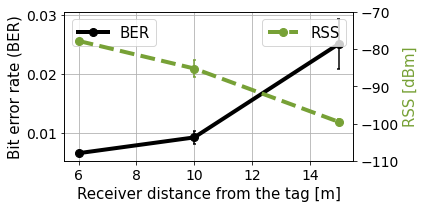

In [71]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 3
fig, ax1 = plt.subplots(1)

dis = [6, 10, 15]
df_BER = BER.iloc[:, :3]
df_RSS = RSS.iloc[:, :3]

ax1.plot(dis, df_BER.mean(), color='black', marker='o', markersize=8, linewidth=4, label='BER')
ax1.set_xlabel('Receiver distance from the tag [m]', fontsize=15)
ax1.set_ylabel('Bit error rate (BER)', fontsize=15)
ax1.tick_params(labelsize=14)

ax2=ax1.twinx()
ax2.plot(dis, df_RSS.mean(), color='#77A136', marker='o', markersize=8, linewidth=4, linestyle='--', label='RSS')
ax2.set_ylabel('RSS [dBm]', fontsize=15, color='#77A136')
ax2.tick_params(labelsize=14)
ax2.set_ylim([-110,-70])

# error bar
width=0.05
mean = df_BER.mean()
std = df_BER.std()
for i in range(3):
    d=dis[i]
    m=mean[i]; s=std[i]/2
    ax1.vlines(d, (m-s), (m+s))
    ax1.hlines((m-s), d-width, d+width)
    ax1.hlines((m+s), d-width, d+width)
    
mean = df_RSS.mean()
std = df_RSS.std()
for i in range(3):
    d=dis[i]
    m=mean[i]; s=std[i]/2
    ax2.vlines(d, (m-s), (m+s), color='#77A136')
    ax2.hlines((m-s), d-width, d+width, color='#77A136')
    ax2.hlines((m+s), d-width, d+width, color='#77A136')
    
# tmp = [6, 10, 15]
# ax1.set_xticklabels(tmp)
# ax1.set_xticks(range(-37,12,10))

ax1.grid()
ax1.legend(fontsize=15)
ax2.legend(fontsize=15)
plt.tight_layout()
plt.savefig('./bi_indoor_samefloor.pdf')

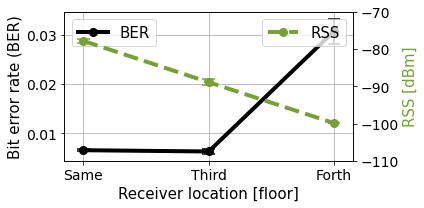

In [64]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 3
fig, ax1 = plt.subplots(1)

dis = [0, 1, 2]

df_BER = BER.iloc[:, [0,3,4]]
df_RSS = RSS.iloc[:, [0,3,4]]

ax1.plot(dis, df_BER.mean(), color='black', marker='o', markersize=8, linewidth=4, label='BER')
ax1.set_xlabel('Receiver location [floor]', fontsize=15)
ax1.set_ylabel('Bit error rate (BER)', fontsize=15)
ax1.tick_params(labelsize=14)
# yaxis
# ax1.set_yscale('log')
# tmp = [-6, -5, -4, -3, -2, -1, 0]
# tmp = ['{:f}'.format(10**i).rstrip('0').rstrip('.') for i in tmp]
# ax1.set_yticklabels(tmp)

ax2=ax1.twinx()
ax2.plot(dis, df_RSS.mean(), color='#77A136', marker='o', markersize=8, linewidth=4, linestyle='--', label='RSS')
ax2.set_ylabel('RSS [dBm]', fontsize=15, color='#77A136')
ax2.tick_params(labelsize=14)
ax2.set_ylim([-110,-70])

# error bar
width=0.05
mean = df_BER.mean()
std = df_BER.std()
for i in range(3):
    d=dis[i]
    m=mean[i]; s=std[i]/2
    ax1.vlines(d, (m-s), (m+s))
    ax1.hlines((m-s), d-width, d+width)
    ax1.hlines((m+s), d-width, d+width)
    
mean = df_RSS.mean()
std = df_RSS.std()
for i in range(3):
    d=dis[i]
    m=mean[i]; s=std[i]/2
    ax2.vlines(d, (m-s), (m+s), color='#77A136')
    ax2.hlines((m-s), d-width, d+width, color='#77A136')
    ax2.hlines((m+s), d-width, d+width, color='#77A136')

ax1.set_xticks([0,1,2])
tmp = ['Same', 'Third', 'Forth']
ax1.set_xticklabels(tmp)

ax1.grid()
ax1.legend(fontsize=15)
ax2.legend(fontsize=15)
plt.tight_layout()
plt.savefig('./bi_indoor_differentfloor.pdf')